In [1]:
# Importing some useful libraries

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sn 

In [2]:
# Loading data into dataframe

train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')


train.head()

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(train.shape)
train['bond_id'].unique().size

(762678, 61)


3736


Details related to other columns are as follows :- 

* id: The row id.
* bond_id: The unique id of a bond to aid in timeseries reconstruction. (This column is only present in the train data not in test data)
* trade_price: The price at which the trade occured.  (This is the column to predict in the test data)
* weight: The weight of the row for evaluation purposes. This is calculated as the square root of the time since the last trade and then scaled so the mean is 1.
* current_coupon: The coupon of the bond at the time of the trade.
* time_to_maturity: The number of years until the bond matures at the time of the trade.
* is_callable: A binary value indicating whether or not the bond is callable by the issuer.
* reporting_delay: The number of seconds after the trade occured that it was reported.
* trade_size: The notional amount of the trade.
* trade_type: 2=customer sell, 3=customer buy, 4=trade between dealers. We would expect customers to get worse prices on average than dealers.
* curve_based_price: A fair price estimate based on implied hazard and funding curves of the issuer of the bond.
* received_time_diff_last{1-10}: The time difference between the trade and that of the previous {1-10}.
* trade_price_last{1-10}: The trade price of the last {1-10} trades.
* trade_size_last{1-10}: The notional amount of the last {1-10} trades.
* trade_type_last{1-10}: The trade type of the last {1-10} trades.
* curve_based_price_last{1-10}: The curve based price of the last {1-10} trades.

In [4]:
_id = 1
train_1 = train[train['bond_id'] == _id]
print(train_1.shape)
train_1.head()

(28, 61)


,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we only have data with bond_id = 1. This way we can do some plotting to get the insights from the data. 

### Plotting 

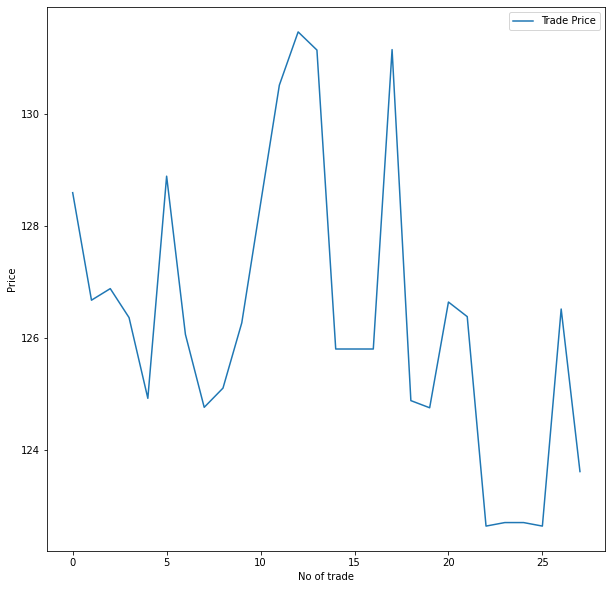

In [5]:
plt.figure(figsize=(10,10))
plt.plot(range(0, len(train_1)),train_1['trade_price'], label='Trade Price')
plt.ylabel('Price')
plt.xlabel('No of trade')
plt.legend()
plt.show()

The above plot shows that the price at bonds are trades are not that much chnage. It is more or less constant depending upon the bond.

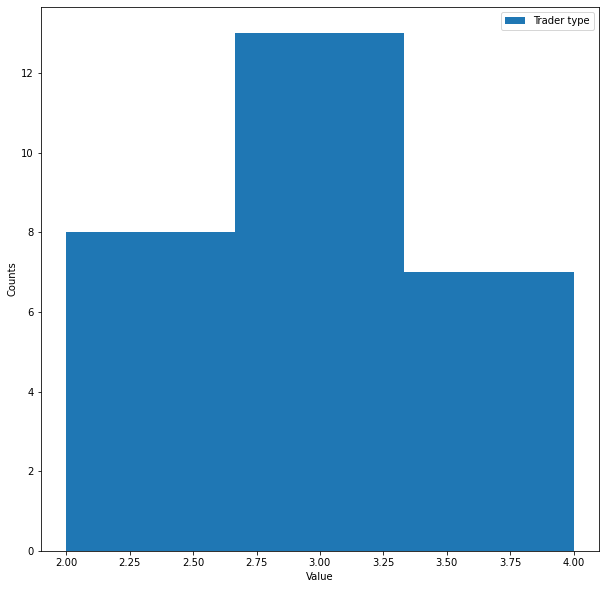

In [6]:
plt.figure(figsize=(10,10))
plt.hist(train_1['trade_type'], bins=3, label='Trader type')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

The above plot shows the count of different type of traders that has done trade. 2=customer sell, 3=customer buy, 4=trade between dealers. We would expect customers to get worse prices on average than dealers.

The below plot shows the count of the current coupon of the bond. 

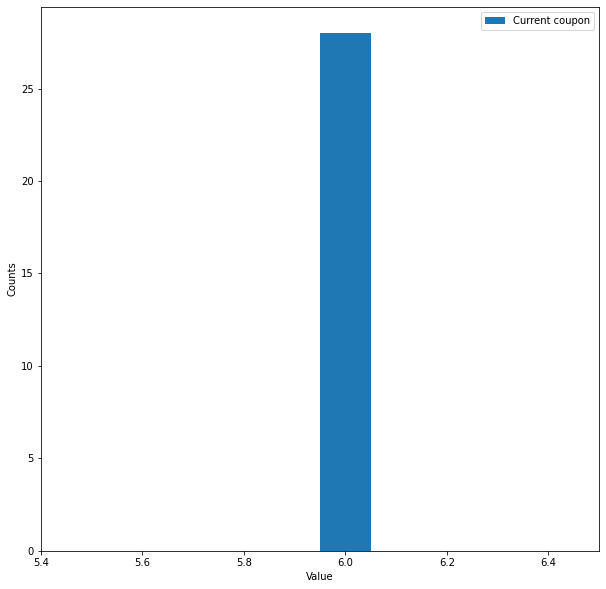

In [7]:
plt.figure(figsize=(10,10))
plt.hist(train_1['current_coupon'], bins=10, label='Current coupon')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

The below plot shows how the maturity time is distributed for given bond. Sometimes it is helpful to decide which type of bonds have high maturity time and which has less, depending upon that price of bond can change a lot. 

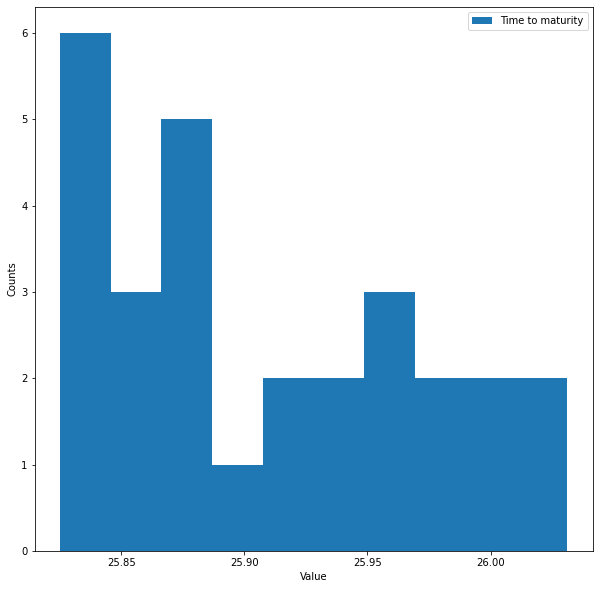

In [8]:
plt.figure(figsize=(10,10))
plt.hist(train_1['time_to_maturity'],bins=10, label='Time to maturity')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

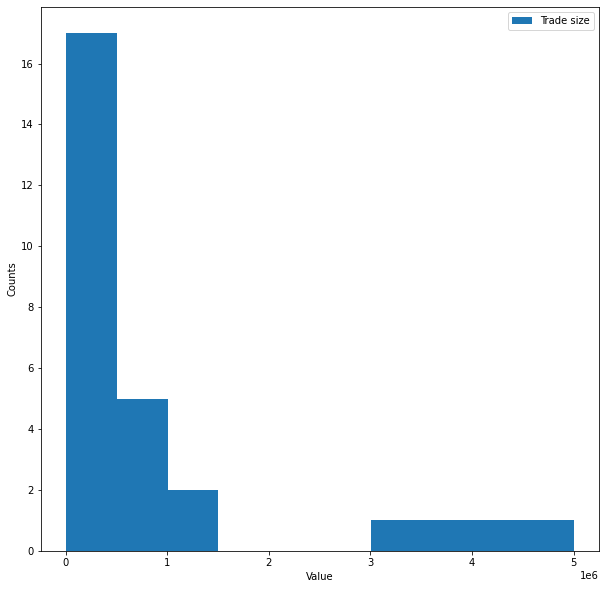

In [9]:
plt.figure(figsize=(10,10))
plt.hist(train_1['trade_size'], bins=10, label='Trade size')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

The above plot shows size of the bods traded. Usually, the size is really big compared to stocks and other commodities. Here the size is from 1000000 to 5000000. 

The below plot shows that at what price the bond has been traded last time. It shows 7 last traded prices and as we can see they are changing more or less in same way. The pattern is not changing for any of the bonds. 

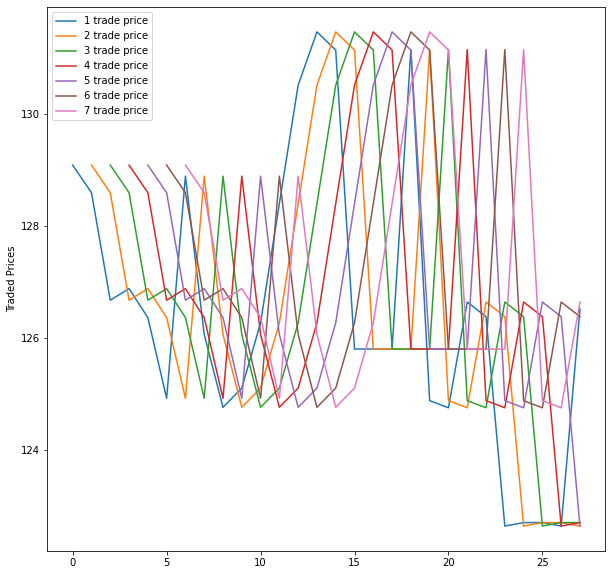

In [10]:
plt.figure(figsize=(10,10))
plt.plot(range(0,len(train_1)), train_1['trade_price_last1'], label='1 trade price')
plt.plot(range(0,len(train_1)), train_1['trade_price_last2'], label='2 trade price')
plt.plot(range(0,len(train_1)), train_1['trade_price_last3'], label='3 trade price')
plt.plot(range(0,len(train_1)), train_1['trade_price_last4'], label='4 trade price')
plt.plot(range(0,len(train_1)), train_1['trade_price_last5'], label='5 trade price')
plt.plot(range(0,len(train_1)), train_1['trade_price_last6'], label='6 trade price')
plt.plot(range(0,len(train_1)), train_1['trade_price_last7'], label='7 trade price')
plt.legend()
plt.ylabel('Traded Prices')
plt.show()

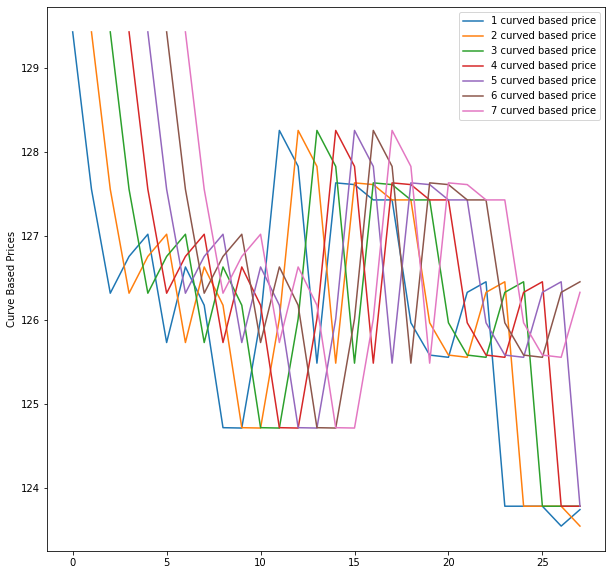

In [11]:
plt.figure(figsize=(10,10))
plt.plot(range(0,len(train_1)), train_1['curve_based_price_last1'], label='1 curved based price')
plt.plot(range(0,len(train_1)), train_1['curve_based_price_last2'], label='2 curved based price')
plt.plot(range(0,len(train_1)), train_1['curve_based_price_last3'], label='3 curved based price')
plt.plot(range(0,len(train_1)), train_1['curve_based_price_last4'], label='4 curved based price')
plt.plot(range(0,len(train_1)), train_1['curve_based_price_last5'], label='5 curved based price')
plt.plot(range(0,len(train_1)), train_1['curve_based_price_last6'], label='6 curved based price')
plt.plot(range(0,len(train_1)), train_1['curve_based_price_last7'], label='7 curved based price')
plt.legend()
plt.ylabel('Curve Based Prices')
plt.show()

The above plot shows the price based on curve. It helps in finding the real rpice of the bond. 